# Start

In [ ]:
import pandas as pd
import numpy as np
import re
import random
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from tqdm import tqdm

from torch.utils.data import Dataset
import torch.optim as optim
from torch import nn
import torch

import warnings
warnings.filterwarnings("ignore")

In [ ]:
seed=1
random.seed(seed)
os.environ['PYTHONHASHSEED']  = str(seed)
np.random.seed(seed)

In [ ]:
# from google.colab import drive, files

# try:
#   drive.mount('/content/drive/data')

#   %cd /content/drive/My Drive
# except:
#   uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Suicide_Detection_10000.csv to Suicide_Detection_10000.csv


In [ ]:
from google.colab import drive
import os

# Check if Google Drive is already mounted
drive_mount_path = '/content/drive'
drive_folder_path = os.path.join(drive_mount_path, 'My Drive')

if not os.path.ismount(drive_mount_path):
    # Mount Google Drive because it is not already mounted
    drive.mount(drive_mount_path)

# Check if the directory exists
if os.path.exists(drive_folder_path):
    # Change the current working directory to "My Drive"
    %cd "$drive_folder_path"
else:
    print(f"The directory {drive_folder_path} does not exist.")

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
df = pd.read_csv('Suicide_Detection_10000.csv')

# EDA

In [ ]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
texts = df['text']
texts

0       Ex Wife Threatening SuicideRecently I left my ...
1       Am I weird I don't get affected by compliments...
2       Finally 2020 is almost over... So I can never ...
3               i need helpjust help me im crying so hard
4       I’m so lostHello, my name is Adam (16) and I’v...
                              ...                        
9995    Help me plz I got my first reward aka the gold...
9996    Anyone wanna chat?  \n\nIm a bit bored right n...
9997    I’m on a bridgeI don’t want to die but right n...
9998    This is serious My dad just turned gay anyone ...
9999    I can't any more.So uhh idk how this works.\n\...
Name: text, Length: 10000, dtype: object

In [ ]:
import re

formatted_texts = texts.apply(lambda x: re.sub(r"(@\[A-Za-z0-9']+)|(\w+:\/\/\S+)|^rt|http.+?", "", x))
formatted_texts = [text.replace("'", " ") for text in formatted_texts]
formatted_texts = [text.replace("’", " ") for text in formatted_texts]
texts = [text.lower() for text in formatted_texts]
texts[:5]

['ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her. as of a few days ago, she began threatening suicide. i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe i ll come back. i know a lot of people will threaten this in order to get their way, but what happens if she really does? what do i do and how am i supposed to handle her death on my hands? i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure. i m worried today may be the day she does it and i hope so much it doesn t happen.',
 'am i weird i don t get affected by compliments if it s coming from someone i know irl but i feel really good when internet strangers do it',
 'finally 2020 is almost over... so i can never hear "2020 has been a bad year" ever again. i swear to fucking god it s so annoying',
 'i

In [ ]:
label_encoder = LabelEncoder()
df['encoded_class'] = label_encoder.fit_transform(df['class'])
labels = df['encoded_class']
labels

0       1
1       0
2       0
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: encoded_class, Length: 10000, dtype: int64

In [ ]:
df.head()

,text,class,encoded_class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,Am I weird I don't get affected by compliments...,non-suicide,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,i need helpjust help me im crying so hard,suicide,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1


In [ ]:
df['encoded_class'].value_counts()

0    5085
1    4915
Name: encoded_class, dtype: int64

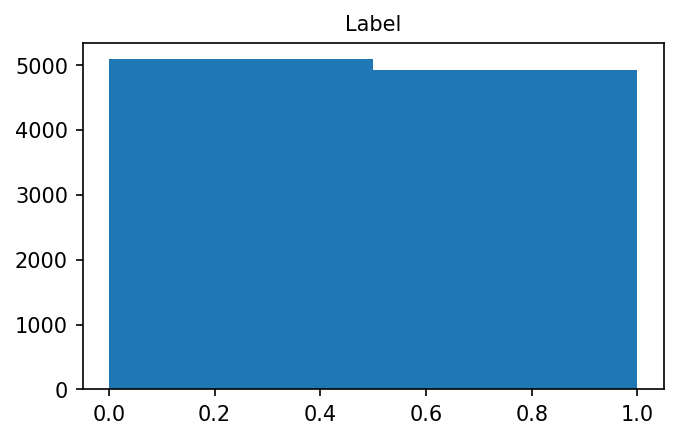

In [ ]:
plt.figure(figsize=(5, 3), dpi=150)
plt.title("Label", fontsize=10)
plt.hist(df["encoded_class"], bins=2);

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_punctuation(tokenized_texts: list) -> list:
    filtered_texts = []
    for tokenized_text in tokenized_texts:
        filtered_texts.append([re.sub(r"[^0-9A-Za-z]", "", token) for token in tokenized_text if re.sub(r"[^0-9A-Za-z]", "", token).strip()])
    return filtered_texts

In [ ]:
def clean_stopwords(tokenized_texts: list) -> list:
    filtered_texts = []
    for tokenized_text in tokenized_texts:
        filtered_texts.append([word for word in tokenized_text if word.lower() not in [*stop_words, 'im']])
    return filtered_texts

In [ ]:
tokenized_texts = []
for text in texts:
  tokenized_texts.append(nltk.word_tokenize(text))

In [ ]:
tokenized_texts = remove_punctuation(tokenized_texts)
tokenized_texts = clean_stopwords(tokenized_texts)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
lemmatized_texts_wo_punct = []
for clean_tokenized_text in tokenized_texts:
  lemmatized_texts_wo_punct.append([wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(clean_tokenized_text)])

In [ ]:
lemmatized_texts_wo_punct = clean_stopwords(lemmatized_texts_wo_punct)
lemmatized_texts_wo_punct = [' '.join(text) for text in lemmatized_texts_wo_punct]

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=3e10dd2effdf4d1d71a8e2a085e71418c21328d6fee0612b7fa7510840d9ea2f
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

model_st = SentenceTransformer('all-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    lemmatized_texts_wo_punct,
    labels,
    test_size=0.3,
    random_state=1,
)

In [ ]:
print(f'len(X_train) = {len(X_train)}')
print(f'len(y_train) = {len(y_train)}')
print(f'len(X_test) = {len(X_test)}')
print(f'len(y_test) = {len(y_test)}')

len(X_train) = 7000
len(y_train) = 7000
len(X_test) = 3000
len(y_test) = 3000


In [ ]:
X_train_emb = model_st.encode(X_train)
X_test_emb = model_st.encode(X_test)

# Model

In [ ]:
model = nn.Sequential(
    nn.Linear(X_train_emb.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
).to("cpu")

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, input_df, target_df, transform=None):
        self.input_df = input_df
        self.target_df = target_df
        self.transform = transform

    def __len__(self):
        return len(self.input_df)

    def __getitem__(self, index):
        # Get the input and target data at the specified index
        input_tensor = torch.tensor(self.input_df[index], dtype=torch.float32)
        target_tensor = torch.tensor(self.target_df[index], dtype=torch.float32)
        return input_tensor, target_tensor

In [ ]:
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

In [ ]:
train_loader = torch.utils.data.DataLoader(CustomDataset(X_train_emb, y_train_array), 64, shuffle=True)

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass and compute the loss
        outputs = model(inputs.view(inputs.size(0), -1))
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels)

        # Backward pass and optimize the parameters
        loss.backward()
        optimizer.step()

        # Print the statistics
        running_loss += loss.item()
        if i == len(train_loader) - 1:
            print('epoch %d loss: %.3f' % (epoch+1, running_loss / 100))

epoch 1 loss: 0.326
epoch 2 loss: 0.249
epoch 3 loss: 0.225
epoch 4 loss: 0.200
epoch 5 loss: 0.176
epoch 6 loss: 0.154
epoch 7 loss: 0.135
epoch 8 loss: 0.107
epoch 9 loss: 0.091
epoch 10 loss: 0.072


In [ ]:
test_loader = torch.utils.data.DataLoader(CustomDataset(X_test_emb, y_test_array), 1, shuffle=False)

In [ ]:
total_loss = 0
total_correct = 0
preds = []
with torch.no_grad():
    for inputs, targets in test_loader:
        output = model(inputs)
        if output >= 0.5:
          preds.append(1)
        else:
          preds.append(0)
len(preds)

3000

In [ ]:
print(classification_report(y_test_array, preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1492
           1       0.90      0.92      0.91      1508

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

